### Surviving 

### Importing Libraries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

### Importing Data

In [2]:
train_df=pd.read_csv('/work/Titanic/train.csv')
test_df=pd.read_csv('/work/Titanic/test.csv')

Looking at data set

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


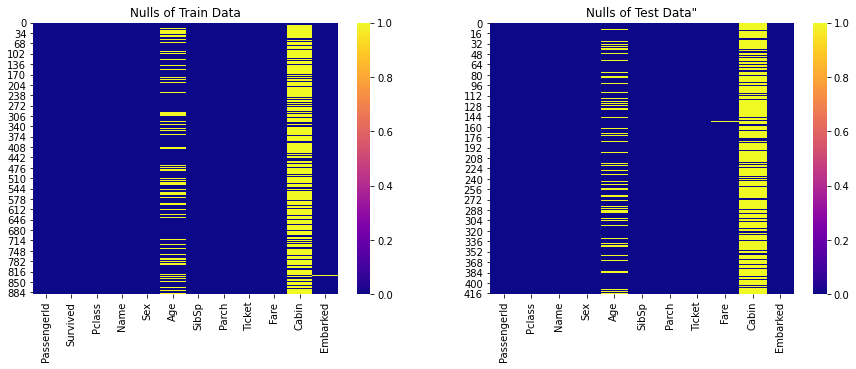

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [4]:
#Heat map of null cells
fig = plt.figure(figsize=(15,5))
fig.add_subplot(121)
plt.title('Nulls of Train Data')
sns.heatmap(train_df.isnull(), cmap='plasma')

fig.add_subplot(122)
plt.title('Nulls of Test Data"')
sns.heatmap(test_df.isnull(), cmap='plasma')
plt.show()

missing_percentage_train = train_df.isnull().sum() * 100 / len(train_df) #Calculating percentage of missing values
missing_percentage_train

### Handling Null Data

#### Cabin

<AxesSubplot:xlabel='Cabin', ylabel='Survived'>

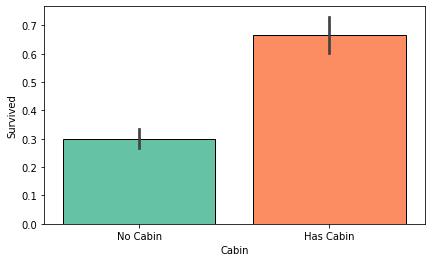

In [5]:
train_df.Cabin.fillna("No Cabin", inplace=True) #We named Null cells as 'Empty'
test_df.Cabin.fillna("No Cabin", inplace=True) #We named Null cells as 'Empty'

train_df.loc[train_df["Cabin"] != "No Cabin", "Cabin"] = "Has Cabin"
test_df.loc[test_df["Cabin"] != "No Cabin", "Cabin" ] ="Has Cabin"

fig = plt.figure(figsize=(15,4))
fig.add_subplot(121)
sns.barplot(data=train_df, x="Cabin",y="Survived" , palette="Set2",saturation=2,edgecolor=(0,0,0),  linewidth=1)

Having a cabin or not it effects to survive rate very impressive!
So turn the data to 1 and 0

In [10]:
train_df.loc[train_df["Cabin"] == "No Cabin", "Cabin"] = 0
test_df.loc[test_df["Cabin"] == "No Cabin", "Cabin" ] =0
train_df.loc[train_df["Cabin"] == "Has Cabin", "Cabin"] = 1
test_df.loc[test_df["Cabin"] == "Has Cabin", "Cabin" ] =1

#### Embarked

There is only 2 null data on this column, so we can easily consider filling it with the mode of this feature



In [12]:
train_df['Embarked']=train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])


test_df['Embarked']=test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])


0
0


#### Scaling

#### One Hot Encoding

In [41]:
#Creating new columns for Embarked
train_df=pd.get_dummies(train_df, columns=['Embarked'])

#Creating new columns for Passanger Class
train_df=pd.get_dummies(train_df, columns=['Pclass'])



,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,0,0,1,0,0,1


**Turning age column to binary** 

We know that being a female having more chanceses to surviving!

In [30]:
train_df.loc[train_df["Sex"] == "male", "Sex"] = 0
train_df.loc[train_df["Sex"] == "female", "Sex"] = 1

test_df.loc[train_df["Sex"] == "male", "Sex"] = 0
test_df.loc[train_df["Sex"] == "female", "Sex"] = 1

### Modelling
* Defining split data

* We will create for loop for trying to every kind of classification models

In [43]:
#train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0,test_size=0.2)
train_y=train_df["Survived"]
train_X=train_df.drop(["Survived","Name","PassengerId"],axis=1)

#test_y=test_df["Survived"] **** There wont be any test_y because it is a kaggle competetion we will send to kaggle
test_x=train_df.drop(["Name","PassengerId"],axis=1)


Creating parameters

In [44]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

Running classification models for finding best result!

In [ ]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(iris.data, iris.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_scores = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_scores

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=91fc748d-6dfe-4653-b79b-4cbc51a66576' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>